<h1 align="center">
<img src="https://raw.githubusercontent.com/SciQLop/speasy/main/logo/logo_speasy.svg" width="300">
</h1><br>

# Space Physics made EASY

[![Chat on Matrix](https://img.shields.io/matrix/speasy:matrix.org)](https://matrix.to/#/#speasy:matrix.org)
[![image](https://img.shields.io/pypi/v/speasy.svg)](https://pypi.python.org/pypi/speasy)
[![image](https://github.com/SciQLop/speasy/workflows/Tests/badge.svg)](https://github.com/SciQLop/speasy/actions?query=workflow%3A%22Tests%22)
[![Documentation Status](https://readthedocs.org/projects/speasy/badge/?version=latest)](https://speasy.readthedocs.io/en/latest/?badge=latest)
[![Coverage Status](https://codecov.io/gh/SciQLop/speasy/coverage.svg?branch=main)](https://codecov.io/gh/SciQLop/speasy/branch/main)
[![CodeQL](https://github.com/SciQLop/speasy/actions/workflows/codeql.yml/badge.svg)](https://github.com/SciQLop/speasy/actions/workflows/codeql.yml)
[![Zendoo DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.4118780.svg)](https://doi.org/10.5281/zenodo.4118780)
[![Discover on MyBinder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/SciQLop/speasy/main?labpath=docs/examples)
[![Discover on Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SciQLop/speasy)
[![Speasy proxy uptime (30 days)](https://img.shields.io/uptimerobot/ratio/m792771930-24b7f89c03d5090a13462b70)](http://sciqlop.lpp.polytechnique.fr/cache)

Speasy is a free and open-source Python package that makes it easy to find and load space physics data from a variety of
online data sources, such as [CDAWEB](https://cdaweb.gsfc.nasa.gov/index.html/) and [AMDA](http://amda.irap.omp.eu/). This can be difficult, especially for students and newcomers, who may not
be familiar with all of the different data sources or how to access them. Speasy solves this problem by providing a single,
easy-to-use interface to over 70 space missions and 65,000 products, including data from the Magnetospheric Multiscale Mission (MMS),
the Advanced Composition Explorer (ACE), and the Van Allen Probes.

## Main features

-   Simple and intuitive API (spz.get_data to get them all)
-   Pandas DataFrame like interface for variables
-   Quick functions to convert a variable to a Pandas DataFrame
-   Local cache to avoid repeating twice the same request
-   Takes advantage of SciQLop dedicated proxy as a community backed ultra fast cache
-   Full support of [AMDA](http://amda.irap.omp.eu/) API
-   Can retrieve time-series from [AMDA](http://amda.irap.omp.eu/),
    [CDAWeb](https://cdaweb.gsfc.nasa.gov/),
    [CSA](https://csa.esac.esa.int/csa-web/),
    [SSCWeb](https://sscweb.gsfc.nasa.gov/)
-   Archive module for accessing data from a local or remote archive without any webservice, using a simple YAML file to describe the archive file tree

## Help us improve Speasy!

We want Speasy to be the best possible tool for space physics research. You can help us by:

- Answering our user survey [here](https://docs.google.com/forms/d/e/1FAIpQLScV12kvETk8jc4Zc4sIsHiteMHRVo5I8DiSAE8RyVdVkUaxJA/viewform?usp=sf_link).
- Reporting bugs or requesting features [here](https://github.com/SciQLop/speasy/issues/new).
- Creating or participating in discussions [here](https://github.com/SciQLop/speasy/discussions).

Your feedback is essential to making Speasy a better tool for everyone.

## Quickstart

Installing Speasy with pip ([more details
here](https://speasy.readthedocs.io/en/stable/installation.html)):

``` console
$ python -m pip install speasy
# or
$ python -m pip install --user speasy
```

Getting data is as simple as:

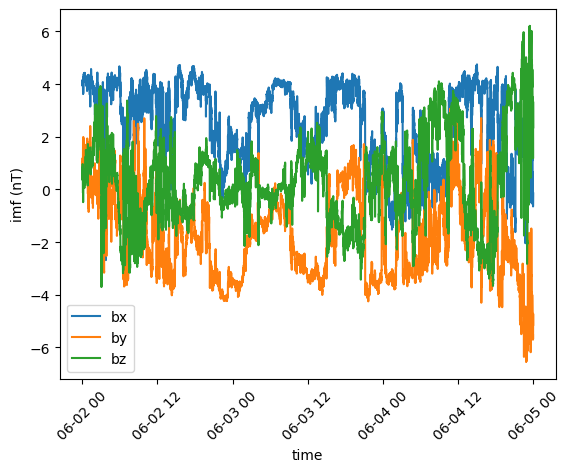

In [1]:
import speasy as spz
ace_mag = spz.get_data('amda/imf', "2016-6-2", "2016-6-5")
ace_mag.plot();

Where amda is the webservice and imf is the product id you will get with
this request.

Using the dynamic inventory will produce the same result as the previous example, but it has the advantage of being easier to manipulate, since you can discover available data from your favorite Python environment completion tool, such as IPython or notebooks.

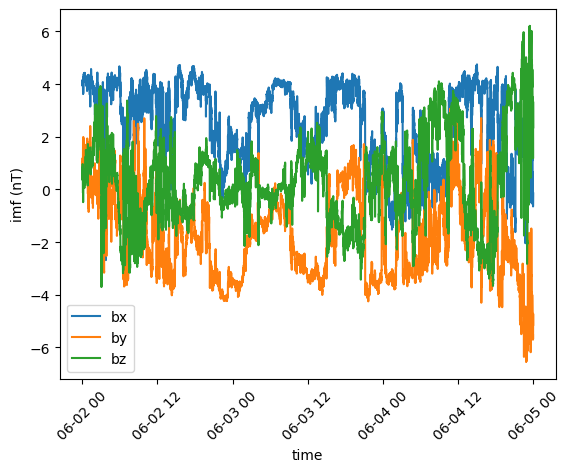

In [2]:
import speasy as spz
amda_tree = spz.inventories.data_tree.amda
ace_mag = spz.get_data(amda_tree.Parameters.ACE.MFI.ace_imf_all.imf, "2016-6-2", "2016-6-5")
ace_mag.plot();

Many product are available you can really easilly build complete visualisations.

This also works with [SSCWEB](https://sscweb.gsfc.nasa.gov/), you can
easily download trajectories:

In [3]:
spz.inventories.tree.cda.MMS.MMS1.DIS.MMS1_FPI_FAST_L2_DIS_MOMS.mms1_dis_energyspectr_omni_fast

<ParameterIndex: mms1_dis_energyspectr_omni_fast>

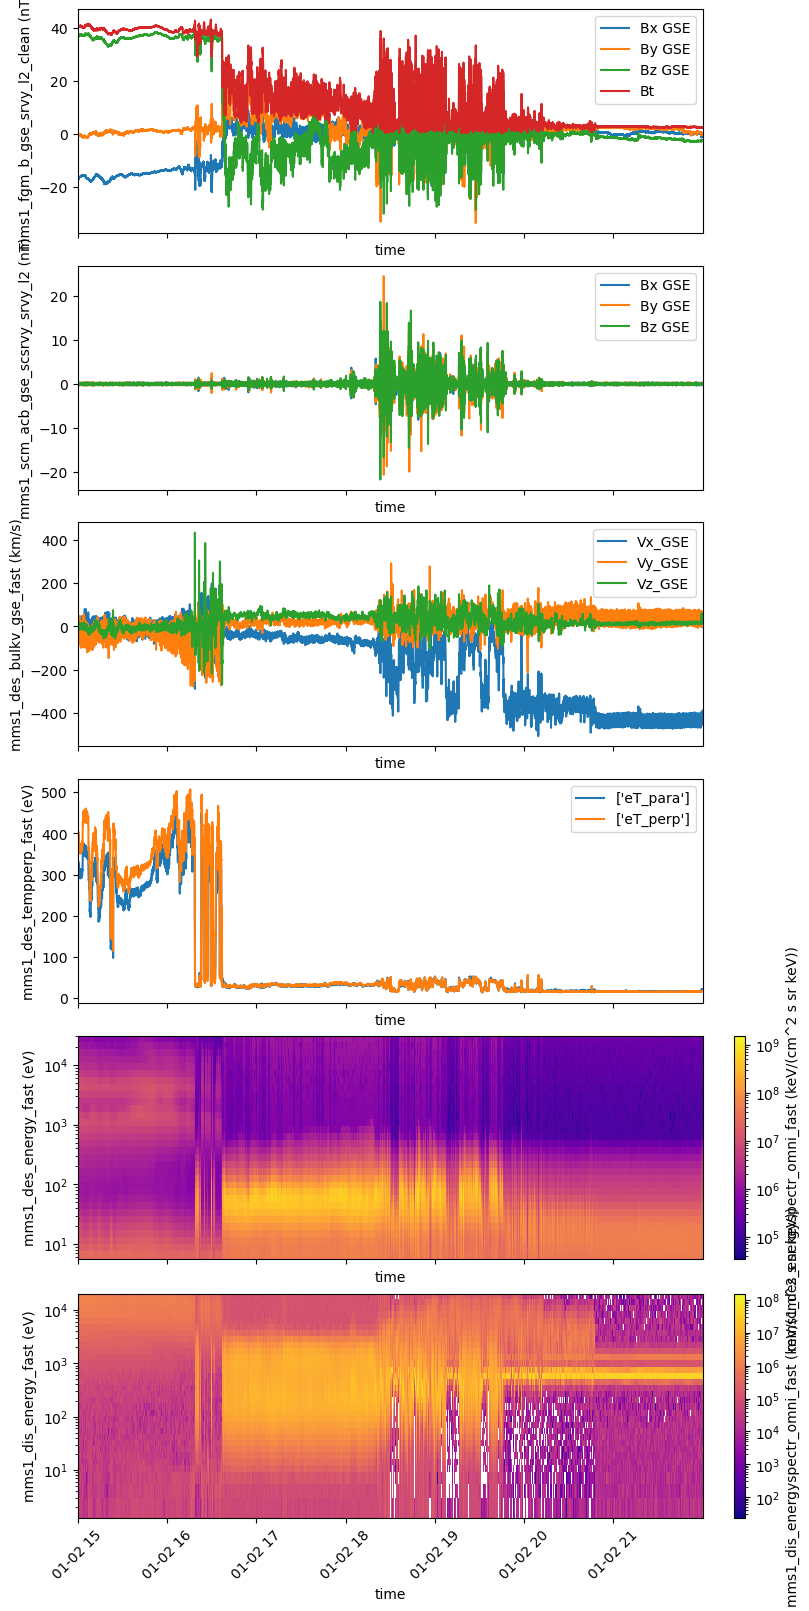

In [4]:
import speasy as spz
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 16), layout="constrained")
gs = fig.add_gridspec(6, hspace=0, wspace=0)
axes = gs.subplots(sharex=True)

plots = [
    (spz.inventories.tree.cda.MMS.MMS1.FGM.MMS1_FGM_SRVY_L2.mms1_fgm_b_gse_srvy_l2_clean, axes[0]),
    (spz.inventories.tree.cda.MMS.MMS1.SCM.MMS1_SCM_SRVY_L2_SCSRVY.mms1_scm_acb_gse_scsrvy_srvy_l2 , axes[1]),
    (spz.inventories.tree.cda.MMS.MMS1.DES.MMS1_FPI_FAST_L2_DES_MOMS.mms1_des_bulkv_gse_fast, axes[2]),
    (spz.inventories.tree.cda.MMS.MMS1.DES.MMS1_FPI_FAST_L2_DES_MOMS.mms1_des_temppara_fast, axes[3]),
    (spz.inventories.tree.cda.MMS.MMS1.DES.MMS1_FPI_FAST_L2_DES_MOMS.mms1_des_tempperp_fast, axes[3]),
    (spz.inventories.tree.cda.MMS.MMS1.DES.MMS1_FPI_FAST_L2_DES_MOMS.mms1_des_energyspectr_omni_fast, axes[4]),
    (spz.inventories.tree.cda.MMS.MMS1.DIS.MMS1_FPI_FAST_L2_DIS_MOMS.mms1_dis_energyspectr_omni_fast, axes[5])
]

def plot_product(product, ax):
    values = spz.get_data(product, "2019-01-02T15", "2019-01-02T22")
    values.replace_fillval_by_nan().plot(ax=ax)

for p in plots:
    plot_product(p[0], p[1])

plt.show()

More complex requests like this one are supported:

In [5]:
import speasy as spz
products = [
    spz.inventories.tree.amda.Parameters.Wind.SWE.wnd_swe_kp.wnd_swe_vth,
    spz.inventories.tree.amda.Parameters.Wind.SWE.wnd_swe_kp.wnd_swe_pdyn,
    spz.inventories.tree.amda.Parameters.Wind.SWE.wnd_swe_kp.wnd_swe_n,
    spz.inventories.tree.cda.Wind.WIND.MFI.WI_H2_MFI.BGSE,
    spz.inventories.tree.ssc.Trajectories.wind,
]
intervals = [["2010-01-02", "2010-01-02T10"], ["2009-08-02", "2009-08-02T10"]]
data = spz.get_data(products, intervals)
data

[[<speasy.products.variable.SpeasyVariable at 0x7fddf2168d00>,

### Documentation and examples

Check out [Speasy documentation](https://speasy.readthedocs.io/en/stable/) and [examples](https://speasy.readthedocs.io/en/latest/examples/index.html).

### Caveats

-   Speasy is not a plotting package, while it provides basic plot
    features, it is not meant to produce publication ready figures.

### Credits

The development of Speasy is supported by the [CDPP](http://www.cdpp.eu/).

This package was created with
[Cookiecutter](https://github.com/audreyr/cookiecutter) and the
[audreyr/cookiecutter-pypackage](https://github.com/audreyr/cookiecutter-pypackage)
project template.
